# How to Automate Data Cleaning with AI <a id="make-a-data-cleaning-agent"></a>

### Want To Become A Full-Stack Generative AI Data Scientist?

![Generative AI Data Scientist](../img/become_a_generative_ai_data_scientist.jpg)

I teach Generative AI Data Science to help you build AI-powered data science apps. [**Register for my next Generative AI for Data Scientists workshop here.**](https://learn.business-science.io/ai-register)


# Table of Contents

1. [Make A Data Cleaning Agent](#make-a-data-cleaning-agent)
2. [Load Libraries](#load-libraries)
3. [Setup AI and Logging](#setup-ai-and-logging)
4. [Load a Dataset](#load-a-dataset)
5. [Create The Agent](#create-the-agent)
6. [Response](#response)
7. [The cleaning recipe](#the-cleaning-recipe)
8. [Data Cleaner Function](#data-cleaner-function)
9. [Cleaned Data As Pandas Data Frame](#cleaned-data-as-pandas-data-frame)
10. [Free Generative AI Data Science Workshop](#free-generative-ai-data-science-workshop)

### Load Libraries <a id="load-libraries"></a>

In [1]:
# * Libraries

from langchain_openai import ChatOpenAI
import os
import yaml
import pandas as pd
from pprint import pprint

from ai_data_science_team.agents import DataCleaningAgent

### Setup AI and Logging <a id="setup-ai-and-logging"></a>

This section of code sets up the LLM inputs and the logging information. Logging is used to store AI-generated code and files during the AI Data Science Teams processing of files. 

*Important Note:* This example uses OpenAI's API. But any LLM can be used such as Anthropic or local LLMs with Ollama.

In [2]:
# * Setup

MODEL    = "gpt-4o-mini"
LOG      = True
LOG_PATH = os.path.join(os.getcwd(), "logs/")

os.environ["OPENAI_API_KEY"] = yaml.safe_load(open('../credentials.yml'))['openai']

llm = ChatOpenAI(model = MODEL)

llm


ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x7fdb3903cca0>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x7fdb3903f370>, root_client=<openai.OpenAI object at 0x7fdb48959570>, root_async_client=<openai.AsyncOpenAI object at 0x7fdb3903cc10>, model_name='gpt-4o-mini', model_kwargs={}, openai_api_key=SecretStr('**********'))

### Load a Dataset <a id="load-a-dataset"></a>

Next, let's load a customer churn data set that we will clean up. 

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/business-science/ai-data-science-team/refs/heads/master/data/churn_data.csv")
df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

### Create The Agent <a id="create-the-agent"></a>

Run this code to create an agent with `make_data_cleaning_agent()`.

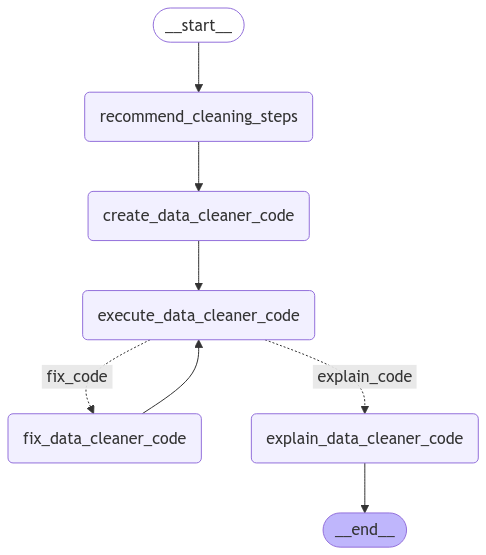

In [4]:
data_cleaning_agent = DataCleaningAgent(
    model = llm, 
    log=LOG, 
    log_path=LOG_PATH
)

data_cleaning_agent

This creates an `app`, which is a langgraph agent with the main inputs:

- **user_instructions**: The data cleaning agent will use these comments to modify the "standard recipe" 
  - Standard Recipe: The standard cleaning recipe which includes removing columns with more than 40% missing values, imputing missing values using mean (numeric) or mode (categorical), removing duplicate rows, and removing outliers. 
- **data_raw**: The raw data to be cleaned
- **max_retries**: Used to limit the number of attempts to fix the python code generated by the agent. Set this to 3 to limit to 3 attempts. 
- **retry_count**: Set this to 0. 

In [5]:
data_cleaning_agent.invoke_agent(
    data_raw=df,
    user_instructions="Don't remove outliers when cleaning the data.",
    max_retries=3,
    retry_count=0
)  

---DATA CLEANING AGENT----
    * RECOMMEND CLEANING STEPS
    * CREATE DATA CLEANER CODE
      File saved to: /Users/mdancho/Desktop/course_code/ai-data-science-team/logs/data_cleaner.py
    * EXECUTING AGENT CODE
No missing values found.
Unique values for MultipleLines: ['No phone service' 'No' 'Yes']
Unique values for InternetService: ['DSL' 'Fiber optic' 'No']
Unique values for OnlineSecurity: ['No' 'Yes' 'No internet service']
Unique values for OnlineBackup: ['Yes' 'No' 'No internet service']
Unique values for DeviceProtection: ['No' 'Yes' 'No internet service']
Unique values for TechSupport: ['No' 'Yes' 'No internet service']
Unique values for StreamingTV: ['No' 'Yes' 'No internet service']
Unique values for StreamingMovies: ['No' 'Yes' 'No internet service']
Detected 0 outliers in MonthlyCharges.
Detected 0 outliers in TotalCharges.
Data cleaning completed. Review the logged outputs for any issues found during cleaning.
Final dataset shape: (7043, 21)
<class 'pandas.core.frame.Da

### Response <a id="response"></a>

The response produced contains everything we need to understand the data cleaning decisions made and get the cleaned dataset. 

In [6]:
response = data_cleaning_agent.get_response()

list(response.keys())

['messages',
 'user_instructions',
 'recommended_steps',
 'data_raw',
 'data_cleaned',
 'all_datasets_summary',
 'data_cleaner_function',
 'data_cleaner_function_path',
 'data_cleaner_function_name',
 'data_cleaner_error',
 'max_retries',
 'retry_count']

#### Cleaned Data As Pandas Data Frame <a id="cleaned-data-as-pandas-data-frame"></a>

Use the `get_data_cleaned()` method to get the cleaned data as a pandas data frame.

In [7]:
data_cleaning_agent.get_data_cleaned()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95       1889.50   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80       1990.50   
7039              Yes    Credit card (automatic)         103.20       7362.90   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40        306.60   
7042              Yes  Bank transfer (automatic)         105.65       6844.50   

      Churn  
0        No  
1        No  
2       Yes  
3        No  
4       Yes  
...     ...  
7038     No  
7039     No  
7040     No  
7041    Yes  
7042     No  

[7043 rows x 21 columns]

#### Data Cleaner Function <a id="data-cleaner-function"></a>

We can use the `get_data_cleaner_function()` method to get the data cleaner function pipeline. 

- In Jupyter Notebooks, setting `markdown=True` will return the function as markdown code. 
- In Streamlit apps, it's recommended to set `markdown=False`.

In [8]:
data_cleaning_agent.get_data_cleaner_function(markdown=True)

```python
# Disclaimer: This function was generated by AI. Please review before using.
# Agent Name: data_cleaning_agent
# Time Created: 2025-01-10 08:07:31

def data_cleaner(data_raw):
    import pandas as pd
    import numpy as np


    # Step 1: Check for Missing Values
    if data_raw.isnull().sum().sum() == 0:
        print("No missing values found.")
    else:
        print("Missing values detected!")

    # Step 2: Convert Data Types
    data_raw['TotalCharges'] = pd.to_numeric(data_raw['TotalCharges'], errors='coerce')

    # Step 3: Remove Duplicate Rows
    data_cleaned = data_raw.drop_duplicates()

    # Step 4: Analyze Data for Additional Cleaning Needs
    categorical_columns = [
        'MultipleLines', 'InternetService', 'OnlineSecurity', 
        'OnlineBackup', 'DeviceProtection', 'TechSupport', 
        'StreamingTV', 'StreamingMovies'
    ]

    for col in categorical_columns:
        # Remove leading/trailing whitespace
        data_cleaned[col] = data_cleaned[col].str.strip()

    # Check unique value counts for categorical variables
    for col in categorical_columns:
        unique_values = data_cleaned[col].unique()
        print(f"Unique values for {col}: {unique_values}")

    # Step 5: Check for Extreme Outliers
    # Here we can use a simple standard deviation method or IQR to identify outliers
    outlier_thresholds = {
        'MonthlyCharges': (data_cleaned['MonthlyCharges'].mean() + 3 * data_cleaned['MonthlyCharges'].std(), 
                           data_cleaned['MonthlyCharges'].mean() - 3 * data_cleaned['MonthlyCharges'].std()),
        'TotalCharges': (data_cleaned['TotalCharges'].mean() + 3 * data_cleaned['TotalCharges'].std(), 
                         data_cleaned['TotalCharges'].mean() - 3 * data_cleaned['TotalCharges'].std())
    }
    
    for key, value in outlier_thresholds.items():
        outliers = data_cleaned[(data_cleaned[key] > value[0]) | (data_cleaned[key] < value[1])]
        print(f"Detected {len(outliers)} outliers in {key}.")

    # Step 6: Log Findings
    print("Data cleaning completed. Review the logged outputs for any issues found during cleaning.")

    # Step 7: Final Review
    print(f"Final dataset shape: {data_cleaned.shape}")
    print(data_cleaned.info())

    return data_cleaned
```

#### Recommended Steps

To get the recommended steps during the data analysis (prior to coding), run the `get_recommended_steps()` method.

In [9]:
data_cleaning_agent.get_recommended_cleaning_steps(markdown=True)



# Recommended Data Cleaning Steps:
1. **Check for Missing Values**: Although there are no missing values in the dataset, confirm that each column is accounted for and has complete data.

2. **Convert Data Types**: 
   - Convert `TotalCharges` from `object` to `float64`, as it should represent numerical values for analysis.

3. **Remove Duplicate Rows**: Check for and remove any duplicate rows to ensure data integrity. 

4. **Analyze Data for Additional Cleaning Needs**: 
   - Inspect the categorical variables to ensure they are formatted consistently (e.g., check for leading/trailing spaces in string fields).
   - Ensure all categorical variables have a manageable number of unique values, particularly for the `MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, and `StreamingMovies` columns.

5. **Check for Extreme Outliers**: Although outlier removal is not required per user instructions, it is still beneficial to identify any extreme outliers for awareness in subsequent analyses. 

6. **Log Findings**: Document any observations made during the cleaning process for future reference or for further analysis.

7. **Final Review**: Conduct a final review of the dataset to confirm all cleaning steps have been successfully implemented without any issues.

### Want To Become A Full-Stack Generative AI Data Scientist?

![Generative AI Data Scientist](../img/become_a_generative_ai_data_scientist.jpg)

I teach Generative AI Data Science to help you build AI-powered data science apps. [**Register for my next Generative AI for Data Scientists workshop here.**](https://learn.business-science.io/ai-register)